In [1]:
# load breaset cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(dir(cancer))
print(cancer.feature_names)
print(cancer.target_names)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [2]:
# cancer to DataFrame
import pandas as pd
import numpy as np
data = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer['feature_names'],["target"]))
#checking to data scalar rates
mal_data = data[data.target == 0]
ben_data = data[data.target == 1]

rate_check_list = [len(mal_data),len(ben_data)]
rate_check_list = np.array(rate_check_list).reshape(1,2)
df = pd.DataFrame(rate_check_list,columns=['Num_Mal_data','Num_ben_data'])
df

,Num_Mal_data,Num_ben_data
0,212,357


In [3]:
# X: data
X = data.drop(["target"], axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Y: class
y = data["target"].astype(int)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
#data scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_X = scale.fit_transform(X)
# just check
df = pd.DataFrame(scale_X,columns= cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [137]:
#splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scale_X,y, test_size = 0.2,
                                                 random_state = 0)

In [138]:
# model selection with cross_validation_score
from sklearn.model_selection import cross_val_score

In [139]:
# LinearRegression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#LinearRegression score
lr_score = cross_val_score(lr,X_train,Y_train,cv = 5)
print(lr_score*100)
print(lr_score.mean()*100)

[63.89835316 73.87244086 72.96414691 78.34530821 75.32221599]
72.8804930249998


In [140]:
# DecisionTree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
#Decision tree score
tree_score = cross_val_score(tree,X_train,Y_train,cv = 5)
print(tree_score*100)
print(tree_score.mean()*100)

[87.91208791 91.20879121 89.01098901 92.30769231 95.6043956 ]
91.20879120879121


In [141]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
#RandomForest score
rfc_score = cross_val_score(rfc,X_train,Y_train,cv = 5)
print(rfc_score*100)
print(rfc_score.mean()*100)

[91.20879121 95.6043956  90.10989011 96.7032967  95.6043956 ]
93.84615384615384


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [142]:
# MLP model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 0)
#Multi Layer Perceptron score
mlp_score = cross_val_score(mlp,X_train,Y_train,cv = 5)
print(mlp_score*100)
print(mlp_score.mean()*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[97.8021978  97.8021978  94.50549451 98.9010989  98.9010989 ]
97.58241758241759


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [143]:
# SVM model
from sklearn.svm import SVC
sv = SVC(random_state = 0)
#Support Vector Machine score
svm_score = cross_val_score(sv,X_train,Y_train,cv=5)
print(svm_score*100)
print(svm_score.mean()*100)

[ 96.7032967   98.9010989   94.50549451  97.8021978  100.        ]
97.58241758241759


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

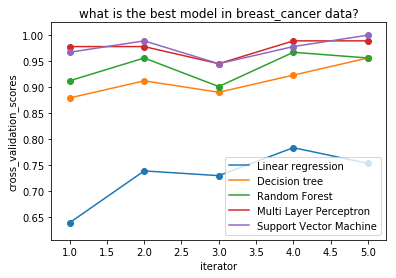

In [144]:
#models score visualization(Graph) with cross validation.
from matplotlib import pyplot as plt
x=[1,2,3,4,5]
plt.scatter(x,lr_score)
plt.scatter(x,tree_score)
plt.scatter(x,rfc_score)
plt.scatter(x,mlp_score)
plt.scatter(x,svm_score)

plt.xlabel("iterator")
plt.ylabel("cross_validation_scores")
plt.title("what is the best model in breast_cancer data?")
plt.plot(x,lr_score, label = "Linear regression")
plt.plot(x,tree_score, label = "Decision tree")
plt.plot(x,rfc_score, label = "Random Forest")
plt.plot(x,mlp_score, label = "Multi Layer Perceptron")
plt.plot(x,svm_score, label = "Support Vector Machine")
plt.legend(loc = 0)
# plt.show()
plt.savefig("what is the best model.png")

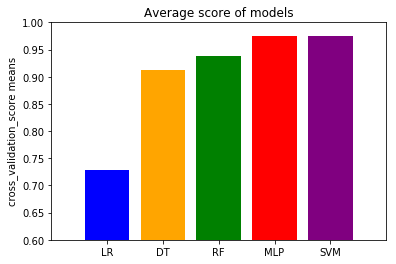

In [145]:
#models score visualization(Bar) with cross validation score means.
model = ["LR","DT","RF",
         "MLP","SVM"]
score_means = [lr_score.mean(),tree_score.mean(),rfc_score.mean(),
              mlp_score.mean(),svm_score.mean()]
colors = ["Blue","orange","green",
          "red","purple"]
plt.bar(model,score_means, color = colors, linewidth = 3)
plt.ylabel("cross_validation_score means")
plt.title("Average score of models")
plt.axis([-1,5,0.6,1.0])
plt.show()
# plt.savefig("Average score of models.png")

# MLP Learning CASE 1, run time :10minute

In [172]:
# Set the parameters by girdsearch cross-validation
from sklearn.model_selection import GridSearchCV

#set parameters
parameters = {'solver': ['lbfgs','sgd'], 
              'max_iter': [1000],
              'alpha': 10.0 ** -np.arange(1, 6),
              'hidden_layer_sizes':np.arange(1, 36),
              'random_state':[0]}

#set gridsearchCV(CrossValidation)
gsmlp = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

#learning
gsmlp.fit(X_train,Y_train)

#find best hyperparamiters
print(gsmlp.score(X_train, Y_train))
print(gsmlp.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9846153846153847
{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 1000, 'random_state': 0, 'solver': 'sgd'}


In [183]:
#MLP model case 1 : tuning best parameters, one hidden layer
my_mlp = MLPClassifier(hidden_layer_sizes= 12,alpha= 0.1,
                      max_iter = 1000, random_state = 0, solver = "sgd")

#MLP model case 1 learning
my_mlp.fit(X_train,Y_train)

# MLP model case 1 test
mlp_predictions = my_mlp.predict(X_test)

In [184]:
# MLP model case 1 confusion matrix by test set
pd.crosstab(Y_test, mlp_predictions, rownames=['True'], colnames=['Predicted'],
            margins=True)

Predicted,0,1,All
True,,,
0,44,3,47
1,2,65,67
All,46,68,114


# MLP Learning CASE 2, run time: 1h 34m

In [201]:
#two hidden layer
hidden_layer_numbers = []

for i in range(1,36):
    for j in range(1,36):
        hidden_layer_numbers.append([i,j])

#set parameters        
parameters = {'solver': ['lbfgs','sgd'], 
              'max_iter': [1000],
              'alpha': 10.0 ** -np.arange(1, 6),
              'hidden_layer_sizes':hidden_layer_numbers,                  
              'random_state':[0]}

#set gridsearchCV(CrossValidation)
gsmlp = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

#learning
gsmlp.fit(X_train,Y_train)

#find best hyperparamiters
print(gsmlp.score(X_train, Y_train))
print(gsmlp.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9912087912087912
{'alpha': 1e-05, 'hidden_layer_sizes': [2, 19], 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [207]:
#MLP model case2 : tuning best parameter, two hidden layer
my_mlp2 = MLPClassifier(hidden_layer_sizes= (2,19),alpha= 1e-05,
                      max_iter = 1000, random_state = 0, solver = "lbfgs")

#MLP model case2 learning
my_mlp2.fit(X_train,Y_train)

#MLP model case2 test
mlp_predictions2 = my_mlp2.predict(X_test)

In [209]:
#MLP model case2 confusion matrix by test set
pd.crosstab(Y_test, mlp_predictions2, rownames=['True'], colnames=['Predicted'],
            margins=True)

Predicted,0,1,All
True,,,
0,44,3,47
1,0,67,67
All,44,70,114


# SVM  Model

In [217]:
# Set the parameters(SVM parameters)
parameters = {
             'kernel': ['rbf','sigmoid'],
             'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
             'C': [0.001, 0.01, 0.1, 10, 25, 50, 100, 250, 500, 1000]
             }
             
#set gridsearchCV(CrossValidation)
gsvm = GridSearchCV(SVC(random_state=0), parameters,n_jobs= -1)

#learning
gsvm.fit(X_train, Y_train)

#find best hyper_parameters
print(gsvm.score(X_train, Y_train))
print(gsvm.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.989010989010989
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [19]:
#tuning my svm model
my_svm = SVC(C =10, gamma = 0.01, kernel = "rbf")

#my SVM model learning
my_svm.fit(X_train,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
#my SVM model test
predictions = my_svm.predict(X_test)

In [83]:
#my SVM model confusion matrix by test set
pd.crosstab(Y_test, predictions, rownames=['True'], colnames=['Predicted'],
            margins=True)

Predicted,0,1,All
True,,,
0,46,1,47
1,1,66,67
All,47,67,114


In [30]:
# accuracy of my svm model
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,predictions)

In [31]:
# f1_score of my svm model
from sklearn.metrics import f1_score
fs = f1_score(Y_test,predictions)

AUC: 0.982


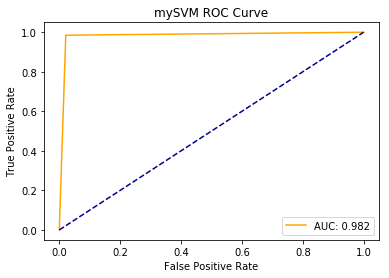

In [211]:
#roc-auc of my svm model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# draw roc_curve
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label="AUC: %.3f" %auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('mySVM ROC Curve')
    plt.legend()
#     plt.show()
    plt.savefig("ROC.png")

auc = roc_auc_score(Y_test,predictions)

fpr,tpr,thresholds = roc_curve(Y_test,predictions)

plot_roc_curve(fpr, tpr)

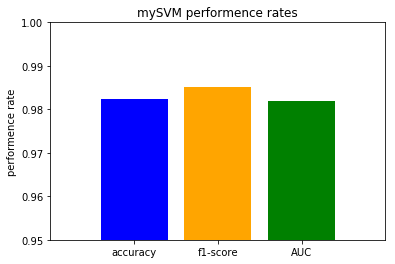

In [222]:
performence_measurement = ["accuracy","f1-score","AUC"]
performence = [acc,fs,auc]
colors = ["Blue","orange","green"]
plt.bar(performence_measurement,performence, color = colors, linewidth = 3)
plt.ylabel("performence rate")
plt.title("mySVM performence rates")
plt.axis([-1,3,0.95,1.0])
plt.show()
# plt.savefig("perfomence rate.png")